In [343]:
from vk_group import VKGroup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from post_processing import PostProcessor
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We use the class VKGroup from the module vk_group to download posts from the group. The class is based on the VK API. This class includes a method that allows extracting post texts from VK groups. To use this class, an access token is required. We store them in a  vk_parse_data_id.json file. The post_count method will count how many posts there are in the group, we download all the posts in the group.

In [353]:
current_directory = os.getcwd()
file_name = "vk_parse_data_id.json"
file_path = os.path.join(current_directory, file_name)

with open(file_path, 'r') as json_file:
    vk_parse_data_id = json.load(json_file)
access_token = vk_parse_data_id["access_token"]
group_domain = vk_parse_data_id["group_domain"]
vk_group = VKGroup(access_token, group_domain)

amount_of_post = vk_group.post_count()
dataset = vk_group.get_posts(offset=0, count=amount_of_post)

### Let's save in /dataset/dataset.csv everything to a file so we don't have to download it every time.

In [355]:
df = pd.DataFrame(dataset, columns=['ID', 'posts', 'Date'])
path_to_data = os.getcwd() + "/dataset/dataset.csv"
df.to_csv(path_to_data, index=False, encoding='utf-8')

## First, let's throw out some of the posts:

We want to throw out posts, since each request costs money, and we would not like to waste it on processing advertising or empty posts.
- Let's remove posts without text 
- We will delete posts with links, as advertising assumes their presence. Non-advertising posts with links can also be deleted (but there are less than 100 
of them).
- We also need to throw out duplicate posts
- Let's throw out posts that are too long (if you look at the distribution by length, it's clear that most posts are no longer than 3000)
- Let's throw out posts that are too short, they are not informative for our task (shorter than 15 characters)
- Remove emoji from text

To do this, we use the PostProcessor class from the post_processing module.


The PostProcessor class is designed for preprocessing datasets containing textual posts. It offers several key functionalities:

- Removing empty posts: Deletes rows where the post text is missing.
- Removing posts with links: Detects and removes posts that contain URLs.
- Removing duplicates: Identifies and removes duplicate posts.
- Filtering by length: Filters posts based on a specified minimum and maximum number of characters.
The class allows for a customizable preprocessing pipeline by specifying which steps to perform. It works by applying different cleaning methods to a pandas DataFrame.
- Remove emoji from text


### Fortunately, the size of the dataset was not affected much ( 16319 -> 13014)


Dataset size befor preprocessing: 16318
None


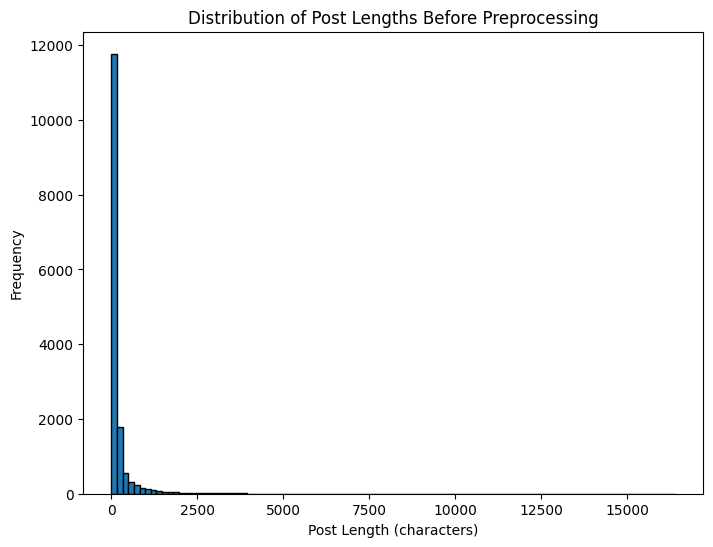

In [367]:
path_to_data = os.getcwd() + "/dataset/dataset.csv"
data = pd.read_csv(path_to_data, header=None, names=['ID', 'posts', 'Date'])

data_size = len(data)
print(print(f"Dataset size befor preprocessing: {data_size}"))


post_lengths = data['posts'].dropna().apply(len)

plt.figure(figsize=(8, 6))
plt.hist(post_lengths, bins=100, edgecolor='black')

plt.title('Distribution of Post Lengths Before Preprocessing')
plt.xlabel('Post Length (characters)')
plt.ylabel('Frequency')

plt.show()

In [368]:
preprocessor = PostProcessor(data, post_column='posts', min_length=15, max_length=300)

processed_data = preprocessor.preprocess()
processed_data_size = len(processed_data)
print(f"Dataset size after preprocessing: {processed_data_size }")

Number of empty posts removed: 902
Number of posts removed that contained links: 93
Number of duplicate posts removed: 49
Number of posts removed by length filter: 2261
Emoji removed
Dataset size after preprocessing: 13013


Text(0, 0.5, 'Frequency')

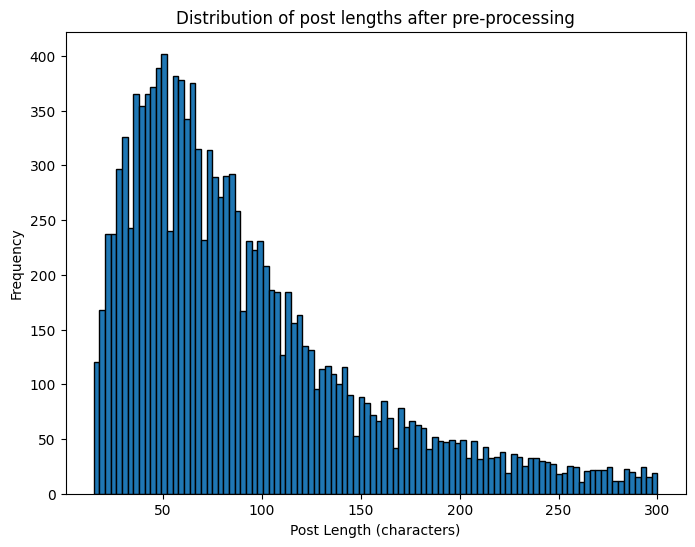

In [360]:
plt.figure(figsize=(8, 6))
plt.hist(processed_data["post_length"], bins=100, edgecolor='black')


plt.title("Distribution of post lengths after pre-processing")
plt.xlabel('Post Length (characters)')
plt.ylabel('Frequency')

In [413]:
# an example of what one element of the dataset looks like (I tried to choose a neutral post)
processed_data.iloc[500:501]

,ID,posts,Date,post_length
1877,646511,Когда спрашивают как твои дела,2020-04-13 11:24:44,30
